In [19]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train = X_train.reshape(60000, 28, 28)
X_test = X_test.reshape(10000, 28, 28)

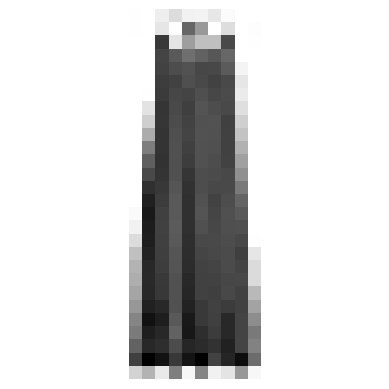

In [20]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2137], cmap="binary")
plt.axis('off')
plt.show()


In [3]:
class_names = ["koszulka", "spodnie", "pulower", "sukienka", "kurtka",
"sandał", "koszula", "but", "torba", "kozak"]
class_names[y_train[2137]]

'sukienka'

C:\Users\wiech\PycharmProjects\um\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

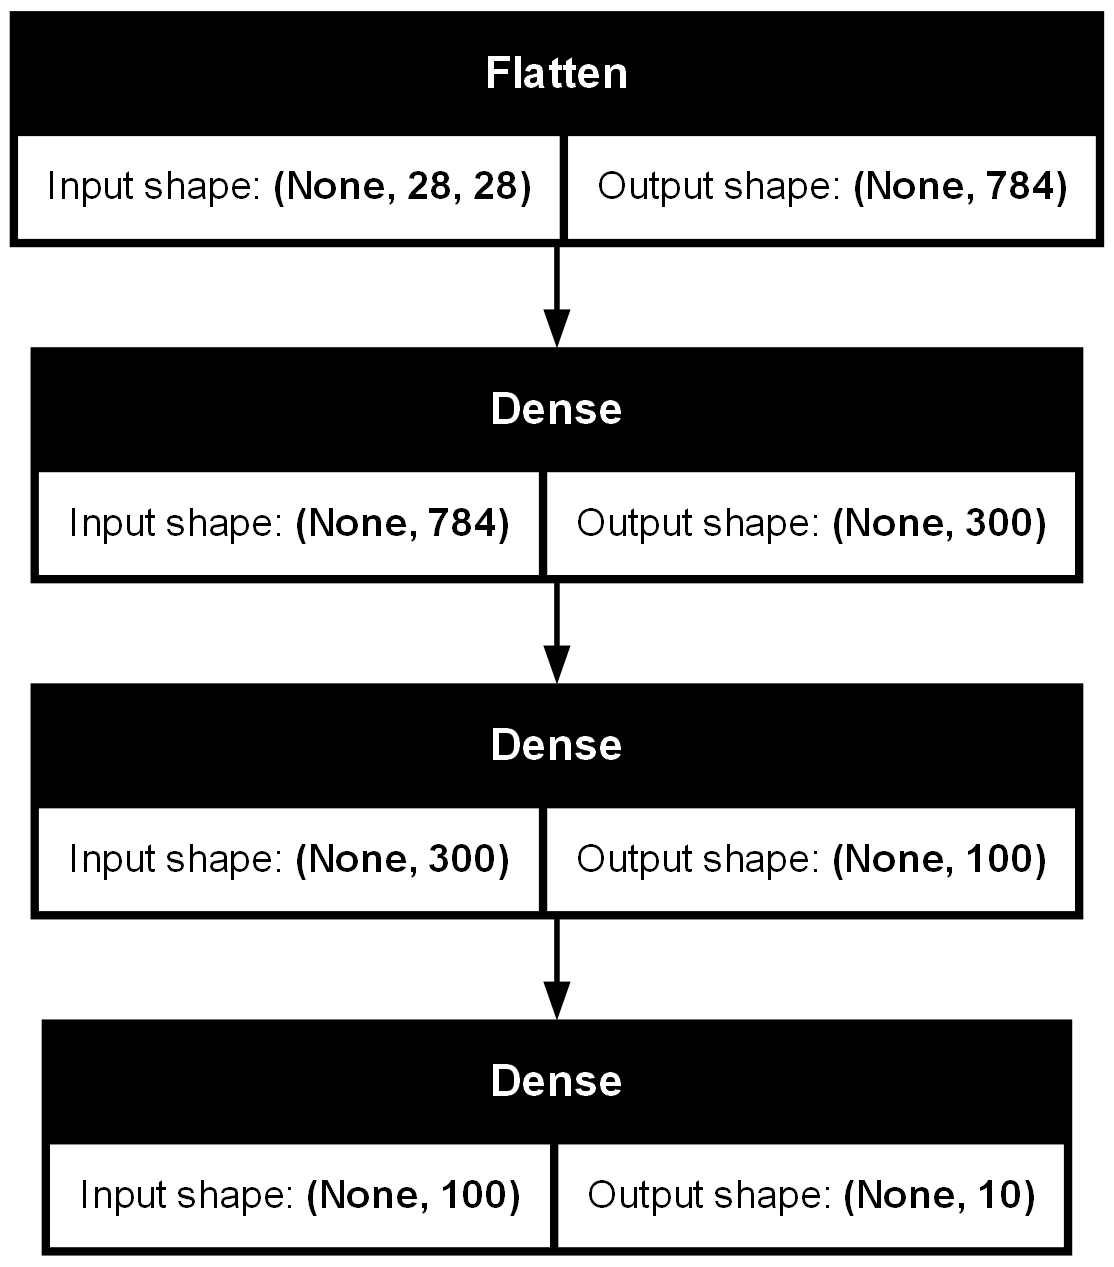

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.summary()
tf.keras.utils.plot_model(model, "fashion_mnist.png", show_shapes=True)

In [5]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [6]:
import datetime
tf_callback = tf.keras.callbacks.TensorBoard(
    log_dir='image_logs' + '/' + datetime.datetime.now().strftime("%Y%m%d-%H%M"),
    histogram_freq=0,
    write_graph=True,
    write_images=True,
    write_steps_per_second=False,
    update_freq='epoch',
    profile_batch=0,
    embeddings_freq=0,
    embeddings_metadata=None
)

In [7]:
model.fit(X_train, y_train, epochs=20, callbacks=[tf_callback], validation_split=0.1)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6932 - loss: 0.9873 - val_accuracy: 0.8042 - val_loss: 0.5594
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8280 - loss: 0.4974 - val_accuracy: 0.8338 - val_loss: 0.4586
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8426 - loss: 0.4473 - val_accuracy: 0.8483 - val_loss: 0.4358
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8545 - loss: 0.4157 - val_accuracy: 0.8600 - val_loss: 0.3982
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8627 - loss: 0.3910 - val_accuracy: 0.8645 - val_loss: 0.3845
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8664 - loss: 0.3787 - val_accuracy: 0.8625 - val_loss: 0.3820
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8728 - loss: 0.3642 - val_accuracy: 0.8633 - val_loss: 0.3832
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8765 - loss: 0.3540 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Prediction: spodnie
Confidence: 0.9999682
Truth: spodnie


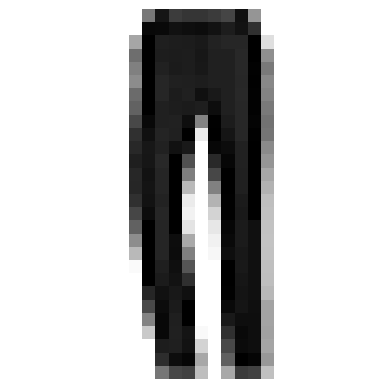

In [8]:
import numpy as np
image_index = np.random.randint(len(X_test))
image = np.array([X_test[image_index]])
confidences = model.predict(image)
confidence = np.max(confidences[0])
prediction = np.argmax(confidences[0])
print("Prediction:", class_names[prediction])
print("Confidence:", confidence)
print("Truth:", class_names[y_test[image_index]])
plt.imshow(image[0], cmap="binary")
plt.axis('off')
plt.show()


In [9]:
model.save('fashion_clf.keras')

In [10]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()
X, y = housing.data, housing.target

In [11]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [13]:
from keras.src.metrics import RootMeanSquaredError

inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(50, activation="relu")(x)
x = tf.keras.layers.Dense(50, activation="relu")(x)
x = tf.keras.layers.Dense(50, activation="relu")(x)
outputs = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(loss="mean_squared_error", 
                  optimizer="Adam", 
                  metrics=[RootMeanSquaredError()])

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,601 (21.88 KB)

 Trainable params: 5,601 (21.88 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
log_dir = "housing_logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=0)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.01, verbose=1)

In [15]:
model.fit(X_train, y_train, epochs=20, 
                        validation_data=(X_val, y_val), 
                        callbacks=[early_stopping_cb, tensorboard_cb])

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.3243 - root_mean_squared_error: 1.1219 - val_loss: 0.4735 - val_root_mean_squared_error: 0.6881
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3985 - root_mean_squared_error: 0.6312 - val_loss: 1.1133 - val_root_mean_squared_error: 1.0551
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4127 - root_mean_squared_error: 0.6413 - val_loss: 0.3550 - val_root_mean_squared_error: 0.5958
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3360 - root_mean_squared_error: 0.5796 - val_loss: 0.3801 - val_root_mean_squared_error: 0.6165
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3135 - root_mean_squared_error: 0.5599 - val_loss: 0.3758 - val_root_mean_squared_error: 0.6130
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2967 - root_mean_squared_error: 0.5446 - val_loss: 0.3895 - val_root_mean_squared_error: 0.6241
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step 

In [16]:
model.save("reg_housing_1.keras")

In [17]:
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(100, activation="relu")(x)
x = tf.keras.layers.Dense(100, activation="relu")(x)
x = tf.keras.layers.Dense(50, activation="relu")(x)
outputs = tf.keras.layers.Dense(1)(x)

model2 = tf.keras.Model(inputs=inputs, outputs=outputs)

model2.summary()

model2.compile(loss="mean_squared_error", 
                  optimizer="Adam", 
                  metrics=[RootMeanSquaredError()])

model2.fit(X_train, y_train, epochs=20, 
                        validation_data=(X_val, y_val), 
                        callbacks=[early_stopping_cb, tensorboard_cb])

model2.save("reg_housing_2.keras")

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,101 (62.89 KB)

 Trainable params: 16,101 (62.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.1866 - root_mean_squared_error: 1.0493 - val_loss: 0.4281 - val_root_mean_squared_error: 0.6543
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3716 - root_mean_squared_error: 0.6089 - val_loss: 0.3573 - val_root_mean_squared_error: 0.5978
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3399 - root_mean_squared_error: 0.5828 - val_loss: 0.3526 - val_root_mean_squared_error: 0.5938
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3045 - root_mean_squared_error: 0.5517 - val_loss: 0.3603 - val_root_mean_squared_error: 0.6003
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3051 - root_mean_squared_error: 0.5523 - val_loss: 0.3711 - val_root_mean_squared_error: 0.6092
Epoch 5: early stopping


In [18]:
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(300, activation="relu")(x)
x = tf.keras.layers.Dense(200, activation="relu")(x)
x = tf.keras.layers.Dense(150, activation="relu")(x)
outputs = tf.keras.layers.Dense(1)(x)

model3 = tf.keras.Model(inputs=inputs, outputs=outputs)

model3.summary()

model3.compile(loss="mean_squared_error", 
                  optimizer="Adam", 
                  metrics=[RootMeanSquaredError()])

model3.fit(X_train, y_train, epochs=20, 
                        validation_data=(X_val, y_val), 
                        callbacks=[early_stopping_cb, tensorboard_cb])

model3.save("reg_housing_3.keras")

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 300)            │         2,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,201 (364.07 KB)

 Trainable params: 93,201 (364.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.9728 - root_mean_squared_error: 0.9530 - val_loss: 1.3035 - val_root_mean_squared_error: 1.1417
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4208 - root_mean_squared_error: 0.6477 - val_loss: 0.5640 - val_root_mean_squared_error: 0.7510
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3484 - root_mean_squared_error: 0.5901 - val_loss: 0.7565 - val_root_mean_squared_error: 0.8698
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3860 - root_mean_squared_error: 0.6151 - val_loss: 0.3248 - val_root_mean_squared_error: 0.5699
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3255 - root_mean_squared_error: 0.5702 - val_loss: 0.3783 - val_root_mean_squared_error: 0.6151
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3100 - root_mean_squared_error: 0.5566 - val_loss: 0.3145 - val_root_mean_squared_error: 0.5608
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step 